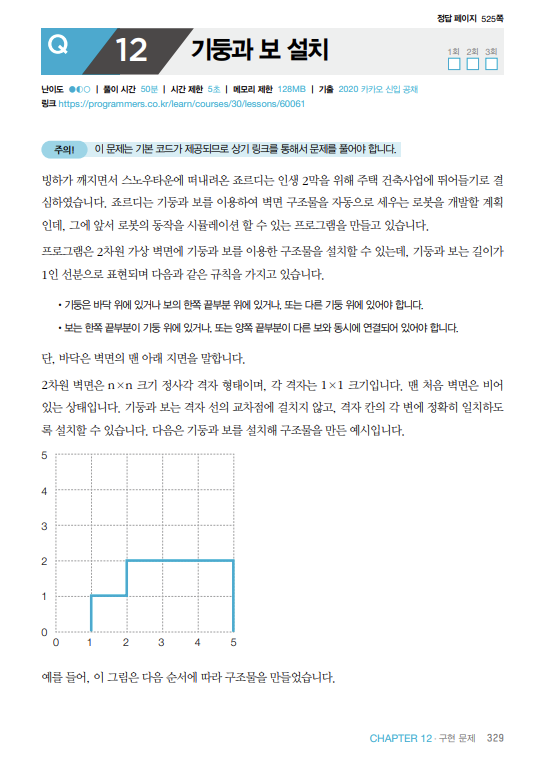

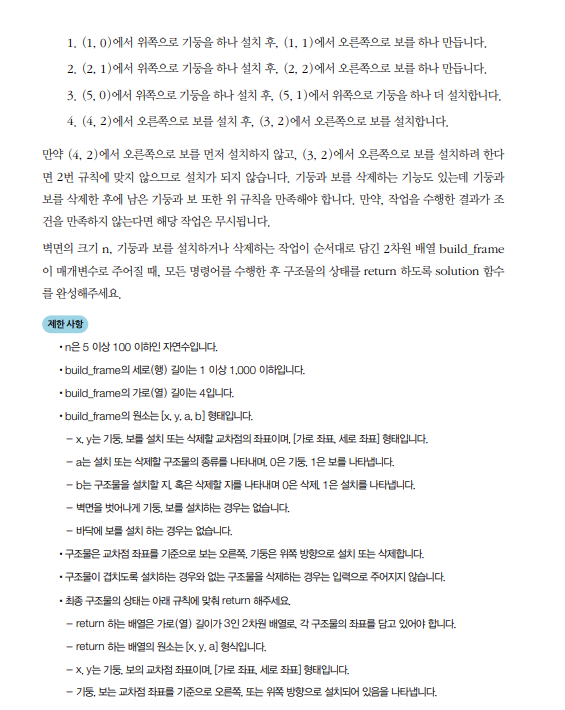

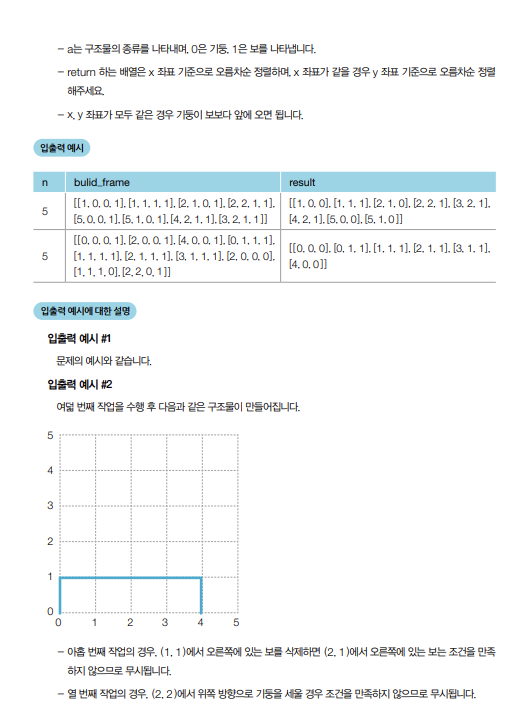

# ver1 : 조건문으로만 해결하려고 하니 정확도가 떨어져서 다음 아이디어로!!

In [137]:
import numpy as np
def solution(n, build_frame):
    
    Board = np.zeros([n+1,n+1])
    print(Board)
    answer=[]

    for x, y, a, b in build_frame:
        
        
        ##기둥 설치
        if a==0 and b==1:   

            if y > 0 and Board[n-y][x]==0:
                print("기둥을 설치할 수 없슴다")

            else: ## 위로 설치
                Board[n-y][x]=Board[n-y][x] +1
                Board[n-y-1][x]=Board[n-y-1][x] +1
                #answer.append([x, y, 0])



        ### 보 설치
        elif a==1 and b==1:  ## y=0 즉 바닥일때는 보 설치 X

            if y==0: ##바닥일때는
                print("바닥에는 보를 설치할 수 없습니다")

            else:  ## 오른쪽으로 설치
                Board[n-y][x]= Board[n-y][x] +1
                Board[n-y][x+1]= Board[n-y][x+1] +1
                #answer.append([x, y, 1])



        ## 기둥 삭제
        elif a==0 and b==0:
            Board[n-y][x]=Board[n-y][x] -1
            Board[n-y-1][x]=Board[n-y-1][x] -1
            



        ## 보 삭제
        elif a==1 and b==0: 

            if Board[n-y][x] ==2 and Board[n-y][x+1] ==2:
                print("보를 삭제할 수 없습니다 ")

            else:
                Board[n-y][x]= Board[n-y][x] -1
                Board[n-y][x+1] = Board[n-y][x+1] -1
                
    '''
    if  Board[n-y][x]>0 and Board[n-y-1][x]>0:
        answer.append([x,y,0])
        
    else :
        answer.append([x,y,1])
    '''

    
    answer.sort(reverse=False)
    return answer




In [136]:
build_frame = [[1,0,0,1],
              [1,1,1,1],
              [2,1,0,1],
              [2,2,1,1],
              [5,0,0,1],
              [5,1,0,1],
              [4,2,1,1],
              [3,2,1,1],]

solution(5, build_frame)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


[[3, 2, 1]]

In [138]:
build_frame = [[0,0,0,1],
              [2,0,0,1],
              [4,0,0,1],
              [0,1,1,1],
              
               [1,1,1,1],
              [2,1,1,1],
              [3,1,1,1],
              [2,0,0,0],
               
               [1,1,1,0],
               [2,2,0,1],]

solution(5, build_frame)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
보를 삭제할 수 없습니다 
기둥을 설치할 수 없슴다


[[2, 2, 1]]

# ver2

In [116]:
'''
보 설치 조건 
: 한쪽 끝 부분이 기둥 위에 있거나, 
양쪽 끝 부분이 다른 보와 동시에 연결되어 있거나 
-> (y>0 and piller[x][y-1]) or    
   (y>0 and x<n and piller[x+1][y-1]) or 
   (bo[x-1][y] and bo[x+1][y])
'''
def bo_check(x, y, bo, piller):
    n = len(bo)
    if (y>0 and piller[x][y-1]) or (y>0 and x<n and piller[x+1][y-1]) or (bo[x-1][y] and bo[x+1][y]):
        return True
    return False


In [117]:
'''
기둥 설치 조건 
: 바닥 위에 있거나, 보의 한쪽 끝 부분 위에 있거나, 
또다른 기둥 위에 있거나 
-> bo[x][y] or 
   (x > 0 and bo[x - 1][y]) or 
   y == 0 or piller[x][y - 1]
'''
def piller_check(x, y, bo, piller):
    if bo[x][y] or (x > 0 and bo[x - 1][y]) or y == 0 or piller[x][y - 1]:
        return True
    return False


In [118]:
'''
보의 존재 유무를 이차원 배열 bo에 저장한다. 
bo [x][y]=True라면 (x,y)에 보가 존재하는 것

기둥의 존재 유무를 이차원 배열 piller에 저장한다. 
piller[x][y]=True라면 (x,y)에 기둥이 존재하는 것 
'''

def delete_check(bo, piller):
    n = len(bo)
    for x in range(n):
        for y in range(n):
            if bo[x][y] and not bo_check(x, y, bo, piller):
                return False
            if piller[x][y] and not piller_check(x, y, bo, piller):
                return False
    return True


In [119]:
def solution(n, build_frame):
    ## 배열판 작성 
    piller = [[0]*(n+1) for _ in range(n+1)]
    bo = [[0]*(n+1) for _ in range(n+1)]
    
    
    for x, y, a, b in build_frame:  ### 반복문 이렇게도 작성한다!!!!
        
        # 추가한다!!!
        if b == 1: 
            if a == 1: # 보
                if bo_check(x, y, bo, piller):
                    bo[x][y] = 1
            
            elif a == 0: ##기둥
                if piller_check(x, y, bo, piller):
                    piller[x][y] = 1
        
        ##삭제한다
        else:  
            if a == 1:  ##보
                bo[x][y] = 0
                if not delete_check(bo, piller):
                    bo[x][y] = 1
            
            elif a == 0:  ##기둥
                piller[x][y] = 0
                if not delete_check(bo, piller):
                    piller[x][y] = 1

    answer = []
    for i in range(n+1):
        for j in range(n+1):
            if piller[i][j]:
                answer.append([i, j, 0])
            if bo[i][j]:
                answer.append([i, j, 1])
    return answer

In [120]:
build_frame = [[1,0,0,1],
              [1,1,1,1],
              [2,1,0,1],
              [2,2,1,1],
              [5,0,0,1],
              [5,1,0,1],
              [4,2,1,1],
              [3,2,1,1],]

solution(5, build_frame)

[[1, 0, 0],
 [1, 1, 1],
 [2, 1, 0],
 [2, 2, 1],
 [3, 2, 1],
 [4, 2, 1],
 [5, 0, 0],
 [5, 1, 0]]